(quick-start)=

# A Quick Start Tutorial

This tutorial provides a quick start guide to using ``ELISA`` to fit a spectral model to X-ray spectral data. The tutorial is divided into three sections:

1. Load Data and Define Spectral Model
2. Bayesian Fit
3. Maximum Likelihood Fit

The data used in this tutorial is from the Insight-HXMT observation of the Crab Nebula. The spectra are obtained by the Low Energy (LE), the Medium Energy (ME), and the High Energy (HE) telescopes. The spectral model used in this tutorial is a power-law model modified by a photoelectric absorption.

The tutorial demonstrates how to fit the spectral model to the data using both Bayesian and Maximum Likelihood methods.

## 1. Load Data and Define Spectral Model

In [1]:
from elisa import Data, BayesFit, MaxLikeFit
from elisa.models import PhAbs, PowerLaw

LE = Data(
    erange=[1.5, 10],
    specfile='data/P011160500104_LE.pi',
    backfile='data/P011160500104_LE.bak',
    respfile='data/P011160500104_LE.rsp',
    group='opt',
)

ME = Data(
    erange=[10, 35],
    specfile='data/P011160500104_ME.pi',
    backfile='data/P011160500104_ME.bak',
    respfile='data/P011160500104_ME.rsp',
    group='opt',
)

HE = Data(
    erange=[28, 250],
    specfile='data/P011160500104_HE.pi',
    backfile='data/P011160500104_HE.bak',
    respfile='data/P011160500104_HE.rsp',
    group='opt',
)

data = [LE, ME, HE]

model = PhAbs() * PowerLaw()

/var/folders/x2/2nnbgrmj3hl3pq2x07gxnt540000gn/T/ipykernel_73578/2819219931.py:4: Warning: spectrum data/P011160500104_LE.bak has zero statistical errors, which may lead to wrong result under Gaussian statistics, consider grouping the spectrum
  LE = Data(
/var/folders/x2/2nnbgrmj3hl3pq2x07gxnt540000gn/T/ipykernel_73578/2819219931.py:12: Warning: spectrum data/P011160500104_ME.bak has zero statistical errors, which may lead to wrong result under Gaussian statistics, consider grouping the spectrum
  ME = Data(
/var/folders/x2/2nnbgrmj3hl3pq2x07gxnt540000gn/T/ipykernel_73578/2819219931.py:20: Warning: spectrum data/P011160500104_HE.bak has zero statistical errors, which may lead to wrong result under Gaussian statistics, consider grouping the spectrum
  HE = Data(


## 2. Bayesian Fit

In [2]:
fit = BayesFit(data, model)
fit

Bayesian Fit

╭──────┬──────────────────┬───────────╮
│ Data │      Model       │ Statistic │
├──────┼──────────────────┼───────────┤
│  LE  │ PhAbs * PowerLaw │   pgstat  │
├──────┼──────────────────┼───────────┤
│  ME  │ PhAbs * PowerLaw │   pgstat  │
├──────┼──────────────────┼───────────┤
│  HE  │ PhAbs * PowerLaw │   pgstat  │
╰──────┴──────────────────┴───────────╯

╭─────┬───────────┬───────────┬───────┬───────────────────────╮
│ No. │ Component │ Parameter │ Value │         Prior         │
├─────┼───────────┼───────────┼───────┼───────────────────────┤
│  1  │   PhAbs   │     nH    │   1   │   Uniform(0, 1e+06)   │
├─────┼───────────┼───────────┼───────┼───────────────────────┤
│  2  │  PowerLaw │   alpha   │  1.01 │    Uniform(-3, 10)    │
├─────┼───────────┼───────────┼───────┼───────────────────────┤
│  3  │  PowerLaw │     K     │   1   │ Uniform(1e-10, 1e+10) │
╰─────┴───────────┴───────────┴───────┴───────────────────────╯

### Run the No-U-Turn Sampler

In [3]:
posterior = fit.nuts(progress=False)
posterior

/Users/xuewc/Library/Application Support/hatch/env/virtual/elisa-lib/wjD8RhHH/elisa-lib/lib/python3.9/site-packages/arviz/stats/stats.py:1632: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


Parameters
╭────────────────┬────────┬──────────┬────────┬───────────────────────┬───────┬──────╮
│   Parameter    │  Mean  │   Std    │ Median │   68.3% Quantile CI   │  ESS  │ Rhat │
├────────────────┼────────┼──────────┼────────┼───────────────────────┼───────┼──────┤
│    PhAbs.nH    │ 0.3544 │ 0.009177 │ 0.3544 │ [-0.009236, 0.009213] │ 28783 │ 1.00 │
├────────────────┼────────┼──────────┼────────┼───────────────────────┼───────┼──────┤
│ PowerLaw.alpha │ 2.118  │ 0.002187 │ 2.118  │ [-0.002191, 0.002183] │ 34380 │ 1.00 │
├────────────────┼────────┼──────────┼────────┼───────────────────────┼───────┼──────┤
│   PowerLaw.K   │ 8.901  │ 0.04595  │ 8.901  │  [-0.04615, 0.04617]  │ 30627 │ 1.00 │
╰────────────────┴────────┴──────────┴────────┴───────────────────────┴───────┴──────╯

Fit Statistics
╭───────┬───────────┬────────────┬────────────┬──────────╮
│  Data │ Statistic │    Mean    │   Median   │ Channels │
├───────┼───────────┼────────────┼────────────┼──────────┤
│   LE  │   pgstat  │   122.18   │   121.60   │    96    │
├───────┼───────────┼────────────┼────────────┼──────────┤
│   ME  │   pgstat  │   18.00    │   17.62    │    17    │
├───────┼───────────┼────────────┼────────────┼──────────┤
│   HE  │   pgstat  │   30.63    │   30.01    │    28    │
├───────┼───────────┼────────────┼────────────┼──────────┤
│ Total │  stat/dof │ 170.81/138 │ 170.18/138 │   141    │
╰───────┴───────────┴────────────┴────────────┴──────────╯

Information Criterion
╭────────┬────────────────┬──────╮
│ Method │    Deviance    │  p   │
├────────┼────────────────┼──────┤
│ LOOIC  │ 175.26 ± 22.77 │ 4.19 │
├────────┼────────────────┼──────┤
│  WAIC  │ 175.21 ± 22.76 │ 4.17 │
╰────────┴────────────────┴──────╯

Pareto k diagnostic
╭─────────────┬──────────┬───────┬────────╮
│    Range    │   Flag   │ Count │  Pct.  │
├─────────────┼──────────┼───────┼────────┤
│ (-Inf, 0.5] │   good   │  141  │ 100.0% │
├─────────────┼──────────┼───────┼────────┤
│  (0.5, 0.7] │    ok    │   0   │  0.0%  │
├─────────────┼──────────┼───────┼────────┤
│   (0.7, 1]  │   bad    │   0   │  0.0%  │
├─────────────┼──────────┼───────┼────────┤
│   (1, Inf)  │ very bad │   0   │  0.0%  │
╰─────────────┴──────────┴───────┴────────╯

### Plot the Trace of Sampler

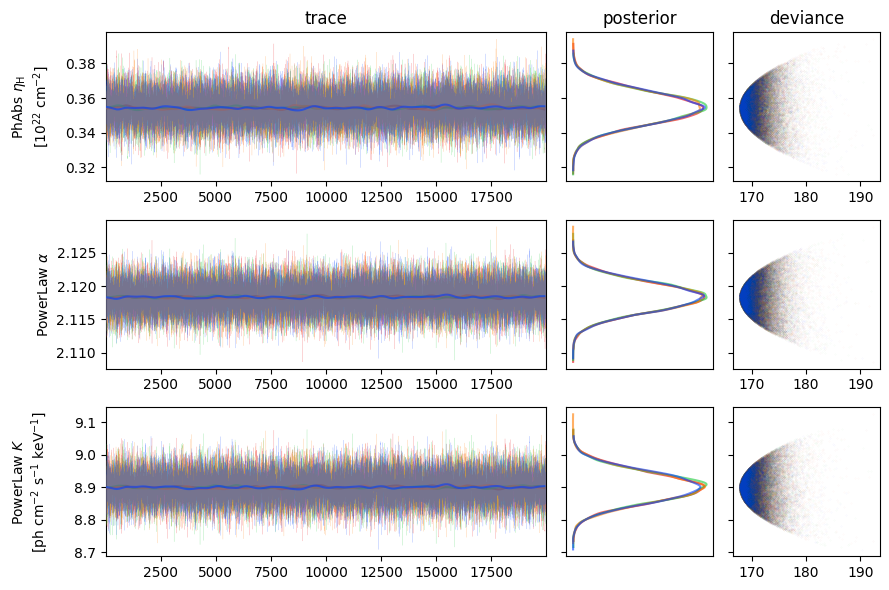

In [4]:
fig = posterior.plot.plot_trace()

### Plot of Spectral Fit and Residuals

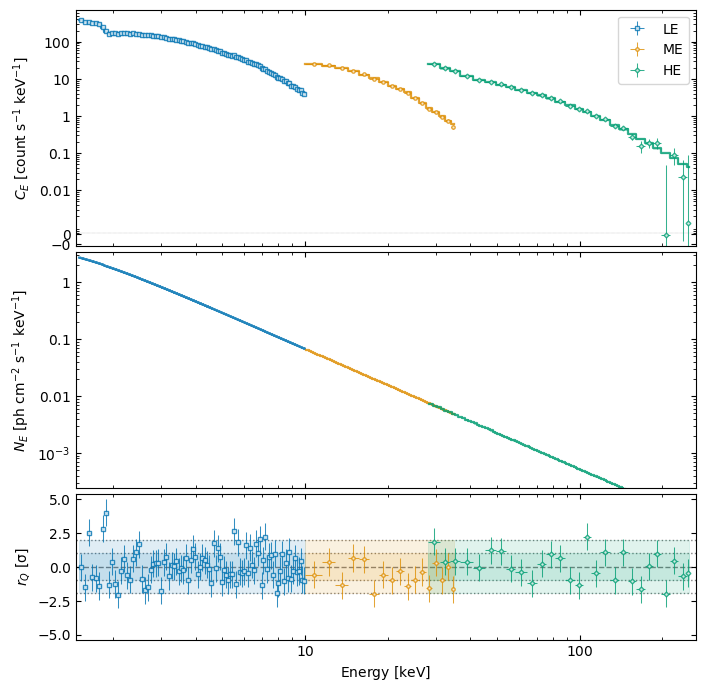

In [5]:
fig = posterior.plot()

### Goodness of Fit: Quantile-Quantile Plot

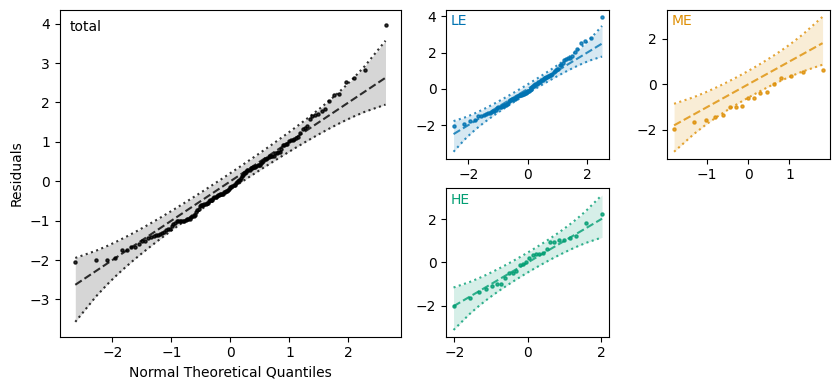

In [6]:
fig = posterior.plot.plot_qq(detrend=False)

### Goodness of Fit: Probability Integral Transform ECDF Plot

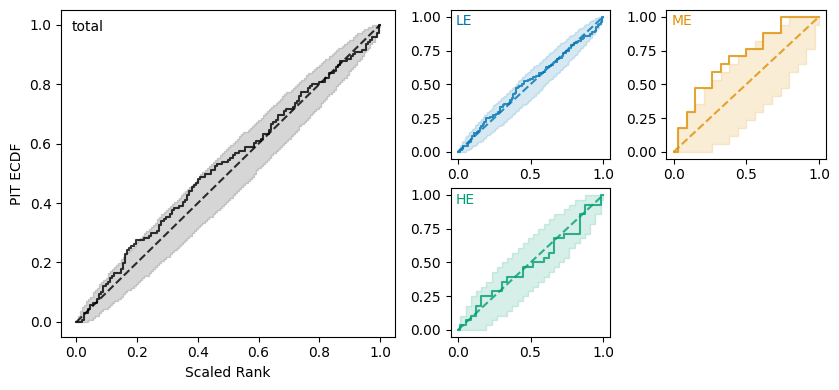

In [7]:
fig = posterior.plot.plot_pit(detrend=False)

### Plot Marginal Posterior Distribution

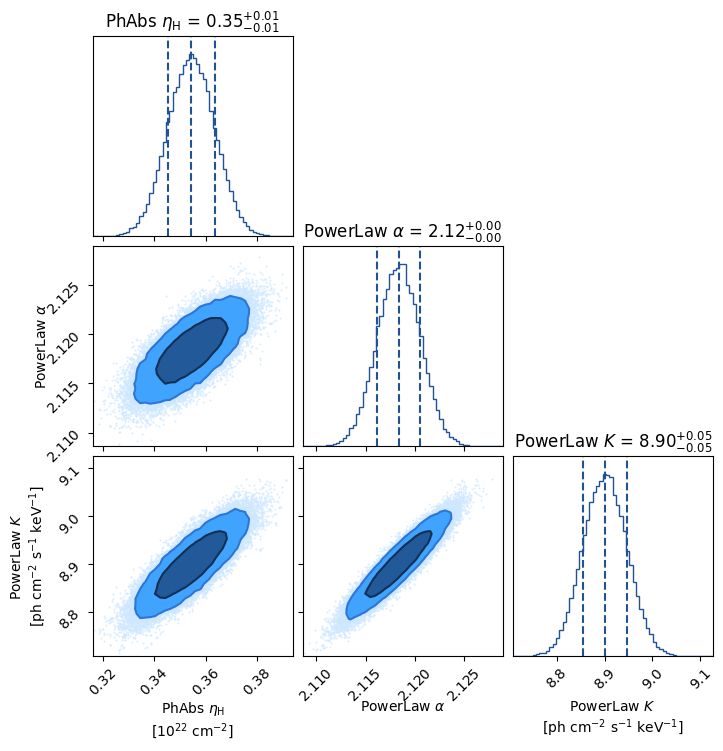

In [8]:
fig = posterior.plot.plot_corner()

### Calculate Credible Intervals of Parameters

In [9]:
ci = posterior.ci()
ci

CredibleInterval(median={'PhAbs.nH': 0.35439882040549237, 'PowerLaw.alpha': 2.1183558967475573, 'PowerLaw.K': 8.900577415299688}, intervals={'PhAbs.nH': (0.3451747772149457, 0.36360472611071043), 'PowerLaw.alpha': (2.116166641793266, 2.120537731560622), 'PowerLaw.K': (8.854462537395515, 8.94673075726215)}, errors={'PhAbs.nH': (-0.009224043190546649, 0.009205905705218065), 'PowerLaw.alpha': (-0.002189254954291453, 0.0021818348130646648), 'PowerLaw.K': (-0.04611487790417357, 0.046153341962462235)}, cl=0.6826894921370859, method='ETI')

In [10]:
ci.median

{'PhAbs.nH': 0.35439882040549237,
 'PowerLaw.alpha': 2.1183558967475573,
 'PowerLaw.K': 8.900577415299688}

In [11]:
ci.errors

{'PhAbs.nH': (-0.009224043190546649, 0.009205905705218065),
 'PowerLaw.alpha': (-0.002189254954291453, 0.0021818348130646648),
 'PowerLaw.K': (-0.04611487790417357, 0.046153341962462235)}

## 3. Maximum Likelihood Fit

In [12]:
model.PhAbs.nH.default = 0.35
fit2 = MaxLikeFit([LE, ME, HE], model)
fit2

Maximum Likelihood Fit

╭──────┬──────────────────┬───────────╮
│ Data │      Model       │ Statistic │
├──────┼──────────────────┼───────────┤
│  LE  │ PhAbs * PowerLaw │   pgstat  │
├──────┼──────────────────┼───────────┤
│  ME  │ PhAbs * PowerLaw │   pgstat  │
├──────┼──────────────────┼───────────┤
│  HE  │ PhAbs * PowerLaw │   pgstat  │
╰──────┴──────────────────┴───────────╯

╭─────┬───────────┬───────────┬───────┬────────────────╮
│ No. │ Component │ Parameter │ Value │     Bound      │
├─────┼───────────┼───────────┼───────┼────────────────┤
│  1  │   PhAbs   │     nH    │  0.35 │   (0, 1e+06)   │
├─────┼───────────┼───────────┼───────┼────────────────┤
│  2  │  PowerLaw │   alpha   │  1.01 │    (-3, 10)    │
├─────┼───────────┼───────────┼───────┼────────────────┤
│  3  │  PowerLaw │     K     │   1   │ (1e-10, 1e+10) │
╰─────┴───────────┴───────────┴───────┴────────────────╯

### Use Levenberg-Marquardt algorithm to find the MLE

In [13]:
mle = fit2.mle(method='lm')
mle

Parameters
╭────────────────┬────────┬──────────╮
│   Parameter    │  MLE   │  Error   │
├────────────────┼────────┼──────────┤
│    PhAbs.nH    │ 0.3543 │ 0.009225 │
├────────────────┼────────┼──────────┤
│ PowerLaw.alpha │ 2.118  │ 0.002194 │
├────────────────┼────────┼──────────┤
│   PowerLaw.K   │  8.9   │  0.0461  │
╰────────────────┴────────┴──────────╯

Fit Statistics
╭───────┬───────────┬────────────┬──────────╮
│  Data │ Statistic │   Value    │ Channels │
├───────┼───────────┼────────────┼──────────┤
│   LE  │   pgstat  │   120.24   │    96    │
├───────┼───────────┼────────────┼──────────┤
│   ME  │   pgstat  │   17.62    │    17    │
├───────┼───────────┼────────────┼──────────┤
│   HE  │   pgstat  │   29.97    │    28    │
├───────┼───────────┼────────────┼──────────┤
│ Total │  stat/dof │ 167.83/138 │   141    │
╰───────┴───────────┴────────────┴──────────╯

Information Criterion
╭────────┬────────╮
│ Method │ Value  │
├────────┼────────┤
│  AIC   │ 174.00 │
├────────┼────────┤
│  BIC   │ 182.67 │
╰────────┴────────╯

Fit Status
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 167.8 (χ²/ndof = 1.2)      │              Nfcn = 86               │
│ EDM = 1.88e-08 (Goal: 0.0002)    │            time = 0.2 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘

### Plot of Spectral Fit and Residuals

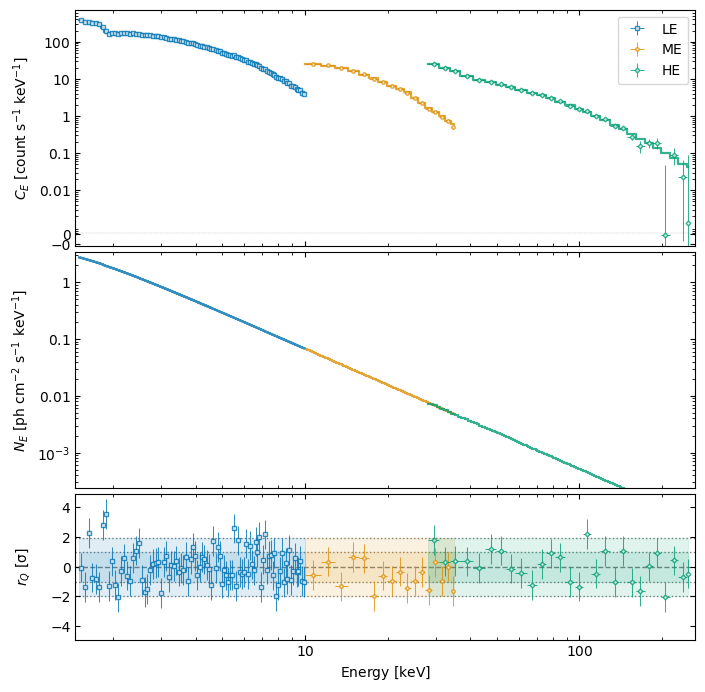

In [14]:
fig = mle.plot()

### Goodness of Fit: Quantile-Quantile Plot

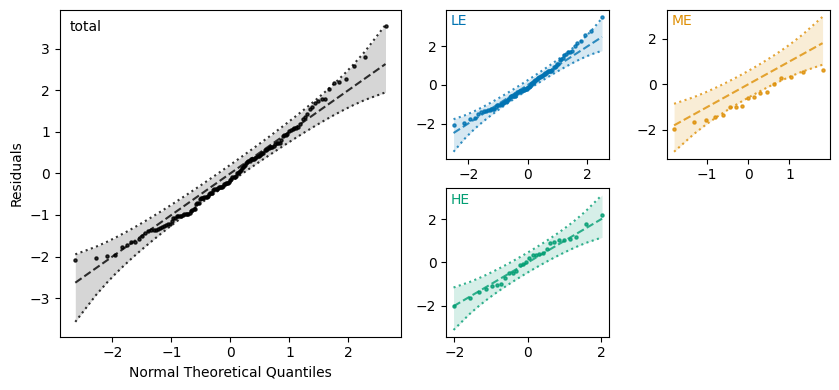

In [15]:
fig = mle.plot.plot_qq(detrend=False)

### Goodness of Fit: Probability Integral Transform ECDF Plot

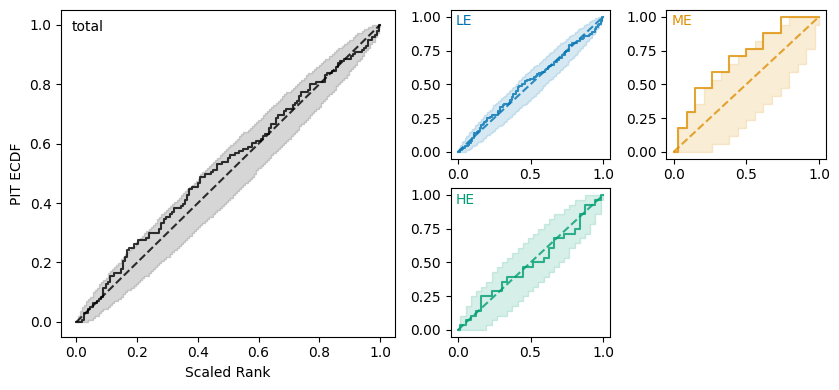

In [16]:
fig = mle.plot.plot_pit(detrend=False)

### Calculate Confidence Intervals of Parameters

In [17]:
ci = mle.ci()
ci

ConfidenceInterval(mle={'PhAbs.nH': 0.3542992682369517, 'PowerLaw.alpha': 2.1183203951244787, 'PowerLaw.K': 8.89994837728174}, intervals={'PhAbs.nH': (0.34507766711432286, 0.36352856117808674), 'PowerLaw.alpha': (2.116128747910696, 2.120516582728072), 'PowerLaw.K': (8.853978471344355, 8.946186303873509)}, errors={'PhAbs.nH': (-0.00922160112262882, 0.009229292941135059), 'PowerLaw.alpha': (-0.0021916472137828436, 0.0021961876035931915), 'PowerLaw.K': (-0.045969905937385036, 0.046237926591768286)}, cl=0.6826894921370859, method='profile', status={'PhAbs.nH': {'valid': (True, True), 'at_limit': (False, False), 'at_max_fcn': (False, False), 'new_min': (False, False)}, 'PowerLaw.K': {'valid': (True, True), 'at_limit': (False, False), 'at_max_fcn': (False, False), 'new_min': (False, False)}, 'PowerLaw.alpha': {'valid': (True, True), 'at_limit': (False, False), 'at_max_fcn': (False, False), 'new_min': (False, False)}})

In [18]:
ci.mle

{'PhAbs.nH': 0.3542992682369517,
 'PowerLaw.alpha': 2.1183203951244787,
 'PowerLaw.K': 8.89994837728174}

In [19]:
ci.errors

{'PhAbs.nH': (-0.00922160112262882, 0.009229292941135059),
 'PowerLaw.alpha': (-0.0021916472137828436, 0.0021961876035931915),
 'PowerLaw.K': (-0.045969905937385036, 0.046237926591768286)}